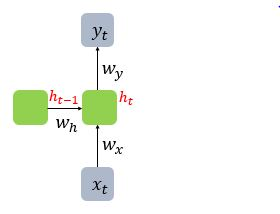

In [10]:
# RNN

'''
현재 시점 t에서의 은닉 상태값을 h_t라고 정의
은닉층의 메모리 셀은 h_t를 계산하기 위해서 총 두 개의 가중치를 가짐 
- 입력층에서 입력값을 위한 가중치 W_t 
- 이전 시점 t-1의 은닉 상태값인 h_t-1을 위한 가중치 W_h

즉,
은닉층 h_t = tanh(W_x*x_t + W_h*h_t-1 + b)
출력층 y_t = f(W_y*h_t + b)
출력층의 활성화함수는 이진 분류를 해야하는 경우라면 시그모이드 함수,
다양한 카테고리 중에서 선택해야하는 문제라면 소프트맥스 함수를 사용
'''

from IPython.display import Image
Image("img/RNN.jpg")

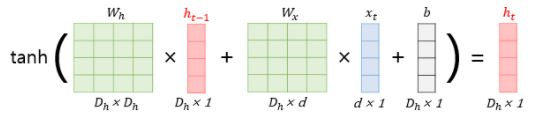

In [11]:
Image("img/hidden layer.jpg")

In [16]:
# 파이썬 Numpy로 RNN 구현하기

'''
pseudocode

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
'''

import numpy as np

timesteps = 10  # 시점의 수 (NLP에서는 보통 문장의 길이)
input_size = 4  # 입력의 차원 (NLP에서는 보통 단어 벡터의 차원)
hidden_size = 8  # 은닉 상태의 크기 (메모리 셀의 용량)

inputs = np.random.random((timesteps, input_size))  # 입력: 2D 텐서 
hidden_state_t = np.zeros((hidden_size,))  # 초기 은닉 상태는 0(벡터)로 초기화
print(hidden_state_t)  # 8의 크기를 가지는 은닉 상태

# 가중치와 편향 정의
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size))  # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,))  # (8,)크기의 1D 텐서 생성. 편향

print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

# RNN층 동작시키기
total_hidden_states = []

for input_t in inputs:  # 입력값이 순서대로 들어감
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b) # t시점에서 출력값
    total_hidden_states.append(list(output_t)) # 각 시점의 은닉값을 축적
    print(np.shape(total_hidden_states))  # t시점의 출력 크기 = (timestep, output_dim)
    hidden_state_t = output_t
    
total_hidden_states = np.stack(total_hidden_states, axis=0)
print(total_hidden_states) # (timesteps, output_dim)의 크기
# 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

[0. 0. 0. 0. 0. 0. 0. 0.]
(8, 4)
(8, 8)
(8,)
(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.89969009 0.93408454 0.95212043 0.87835098 0.97796144 0.98117014
  0.92288035 0.96938256]
 [0.99998263 0.99999262 0.99975663 0.99992959 0.99955554 0.99990844
  0.99991178 0.99996779]
 [0.99998017 0.99999709 0.99985633 0.99998452 0.99995409 0.99997829
  0.9999562  0.9999928 ]
 [0.9999951  0.99999789 0.99992946 0.99997334 0.99991053 0.99998024
  0.99997554 0.99999049]
 [0.99996213 0.99999268 0.99975684 0.99994276 0.99985123 0.99987755
  0.99991564 0.99998588]
 [0.99999306 0.99999785 0.99993762 0.99998612 0.9999701  0.99998926
  0.99998059 0.99999459]
 [0.99998878 0.99999413 0.99991299 0.99998179 0.99993618 0.99997743
  0.99997411 0.99999131]
 [0.99996441 0.99998595 0.99976011 0.99993219 0.99973133 0.99982996
  0.99991896 0.99998003]
 [0.99999371 0.99999882 0.99990556 0.99998285 0.99993158 0.99998644
  0.99996817 0.99999184]
 [0.99999357 0.99999897 0.99993964 0.99999282 0

In [26]:
# nn.RNN()을 통해서 RNN 셀을 구현

import torch
import torch.nn as nn

# 하이퍼파라미터 정의
input_size = 5  # 매 시점마다 들어가는 입력의 크기
hidden_size = 8  # 은닉 상태의 크기

# 입력 텐서를 정의
inputs = torch.Tensor(1, 10, 5)  # (batch_size, time_steps, input_size)

# RNN 셀 만들기
cell = nn.RNN(input_size, hidden_size, batch_first=True)  
# batch_first=True: 입력 텐서의 첫번째 차원이 배치 크기임을 알려줌

# 입력 텐서를 RNN에 넣어 출력 확인
outputs, _status = cell(inputs)
print(outputs, outputs.shape) # 모든 time-step의 hidden_state
# (1,10.8) 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미

print(_status.shape) # 최종 time-step의 hidden_state
# 마지막 시점의 은닉 상태는 (1, 1, 8)의 크기

tensor([[[-1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000,
          -1.0000],
         [-1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  1.0000,
          -1.0000],
         [-1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  1.0000,
          -1.0000],
         [ 0.5962, -0.8243, -0.2801, -0.4078, -0.7229, -0.6475,  0.4235,
           0.4783],
         [-1.0000,  1.0000,  1.0000, -1.0000, -1.0000,  1.0000, -1.0000,
          -1.0000],
         [-1.0000,  1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000],
         [-1.0000,  1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000,
          -1.0000],
         [-1.0000,  1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000],
         [ 1.0000,  1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000,
           1.0000],
         [-1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000]]], grad_fn=<TransposeBackward1>) torch.Size([1, 10, 8])
torch.Size([1, 

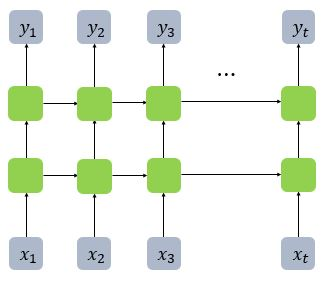

In [29]:
# 깊은 순환 신경망(Deep Recurrent Neural Network)

# 은닉층이 2개인 깊은(deep) 순환 신경망
Image("img/Deep Recurrent Neural Network.jpg")

In [31]:
# nn.RNN()의 num_layers에 값을 전달하여 깊은 순환 신경망 구현
inputs = torch.Tensor(1, 10, 5)  # (batch_size, time_steps, input_size)

# 은닉층 2개의 RNN 구현
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 time-step의 hidden_state
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


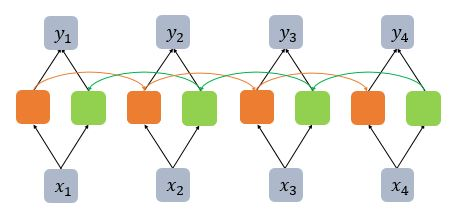

In [32]:
# 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

'''
RNN: 과거 시점(time step)의 데이터들을 참고해서 찾고자하는 정답을 예측
양방향 RNN: 이전 시점의, 이후 시점 데이터를 참고해서 정답 예측 

양방향 RNN은 하나의 출력값을 예측하기 위해 두 개의 메모리 셀을 사용
- 앞 시점의 은닉 상태를 전달받아 현재의 은닉 상태를 계산 (주황색)
- 뒤 시점의 은닉 상태를 전달받아 현재의 은닉 상태를 계산 (초록색)
'''

Image("img/Bidirectional Recurrent Neural Network.jpg")

In [33]:
# nn.RNN()으로 양방향 RNN 구현
inputs = torch.Tensor(1, 10, 5)  # (batch_size, time_steps, input_size)

# nn.RNN()의 인자인 bidirectional에 값을 True로 전달
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True, bidirectional=True)

outputs, _status = cell(inputs)
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


In [ ]:
# LSTM(Long Short-Term Memory)

'''
장기 의존성 문제(the problem of Long-Term Dependencies)
RNN은 출력 결과가 이전의 계산 결과에 의존
RNN은 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점
RNN의 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생

LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가
불필요한 기억을 지우고, 기억해야할 것들을 정함
LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보임
'''

nn.LSTM(input_dim, hidden_size, batch_fisrt=True)